# Theory of Linear Regression

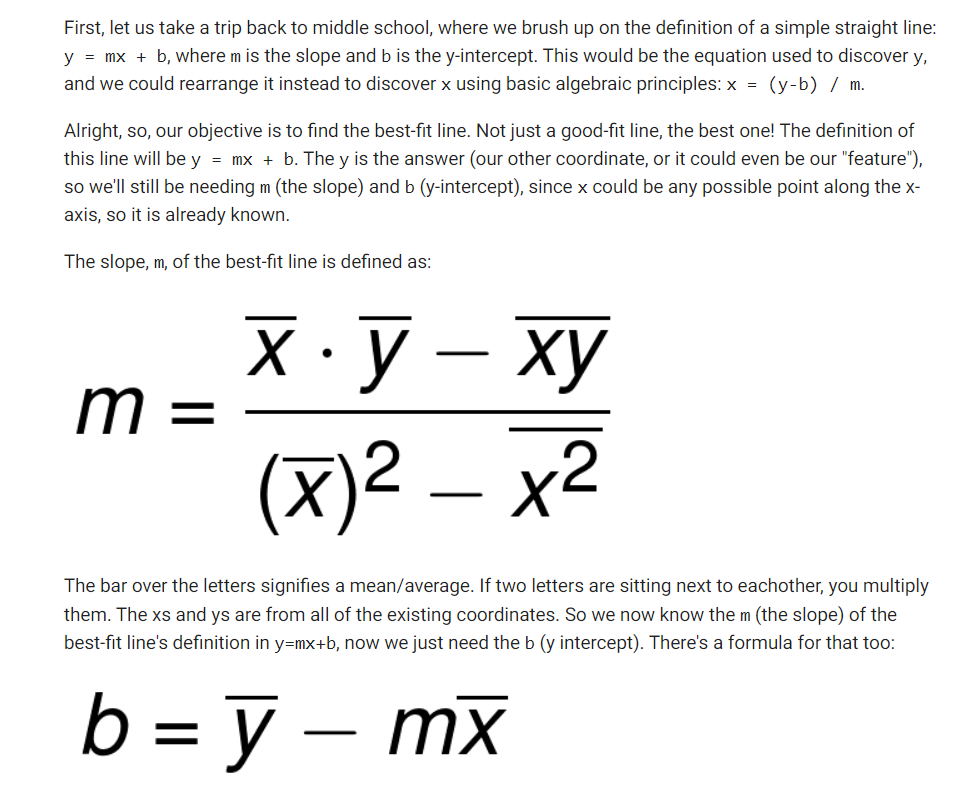

## We create two arrays, and then write the formula for m above and return the best fit slope line and the intercept with the help of definitions given above

In [1]:
from statistics import mean
import numpy as np

xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)


print(m,b)

0.29999999999999893 4.300000000000003


In [2]:
regression_line = [(m*x)+b for x in xs]

## The above 1-liner for loop is the same as doing:

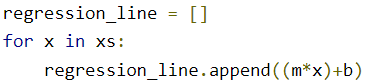

<IPython.core.display.Javascript object>


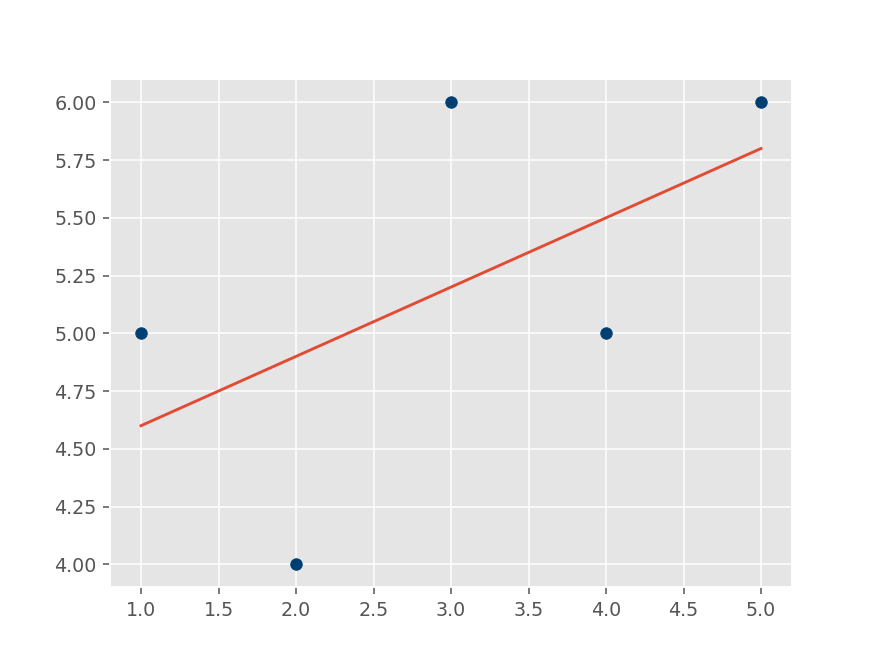

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()

<IPython.core.display.Javascript object>


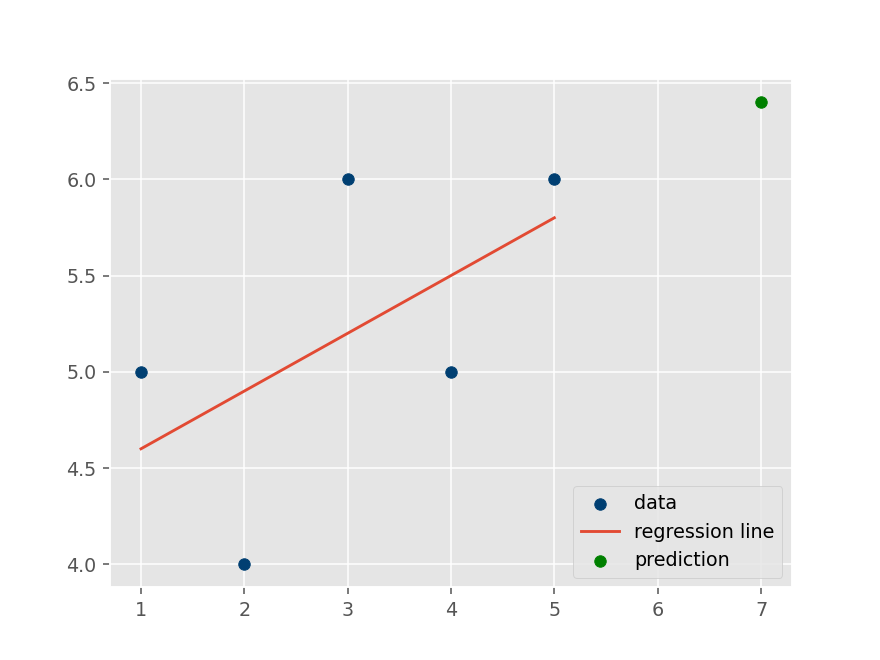

In [4]:
%matplotlib notebook
predict_x = 7
predict_y = (m*predict_x)+b
plt.scatter(xs,ys,color='#003F72',label='data')
plt.plot(xs, regression_line, label='regression line')
plt.scatter(predict_x,predict_y,color="green",label="prediction")
plt.legend(loc=4)
plt.show()

#### Like this we can predict the fututre outcomes

# Theory for R-Squared :

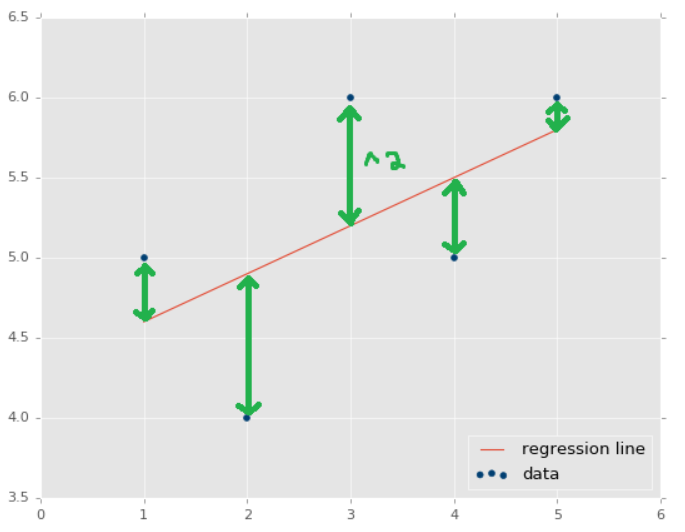

## The distance between the regression line's y values, and the data's y values is the error, then we square that. The line's squared error is either a mean or a sum of this, we'll simply sum it.
## Alright, so we calculate squared error of the regression line, now what? What's that mean? Squared error is totally relative to the dataset, so we need something more. That's where "r squared" comes in, also called the "coefficient of determination." The equation for this is :

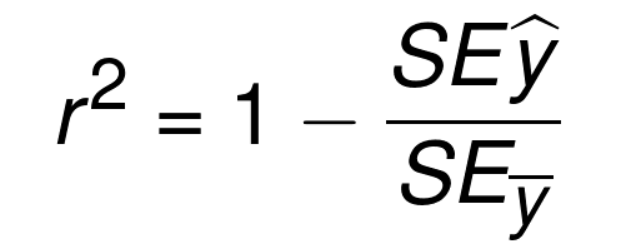

## The equation is essentially 1 minus the division of the squared error of the regression line and the squared error of the mean y line. The mean y line is quite literally the mean of all of the y values from the dataset. If you were to graph it, then it would be a flat, horizontal, line.

In [5]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    return m, b

def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)
    
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

0.3214285714285714


## That's a pretty low value, so actually our best-fit line isn't all that great according to this measure. Is r squared a good measure in this case? It may depend on what your goals are. In most cases, if you care about predicting exact future values, r squared is indeed very useful. If you're interested in predicting motion/direction, then our best fit line is actually pretty good so far, and r squared shouldn't carry as much weight. Look at our actual dataset though. We stuck with low, whole numbers. Variance from value to value was 20-50% at some points, that's a very high variance. It should not be all that surprising that, with this simple dataset, our best fit line still wasn't that descriptive of the actual data.

In [ ]:
def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation == 'pos':
            val+=step
        elif correlation == 'neg':
            val-=step

## This is just a random dataset generator for our upcoming codes

## Here hm means how many i.e how many numbers would be in our dataset(if you are still confused dont look into it too much and just see the place where its executed as youll understand then). Variance would tell how much the data is clustered(see y = val + random.randrange(-variance,variance)). If correlation is pos. or neg. the val would get increased or decreased as the slope line too would increase or decrease(iske examples dekho to samjh jayoge)

In [ ]:
xs = [i for i in range(len(ys))]

## X's are easier as they would just be 1,2,3.........

squared_error_regr = 17007.845778611634
squared_error_y_mean = 38395.90000000001
r_squared = 0.5570400543127878


<IPython.core.display.Javascript object>


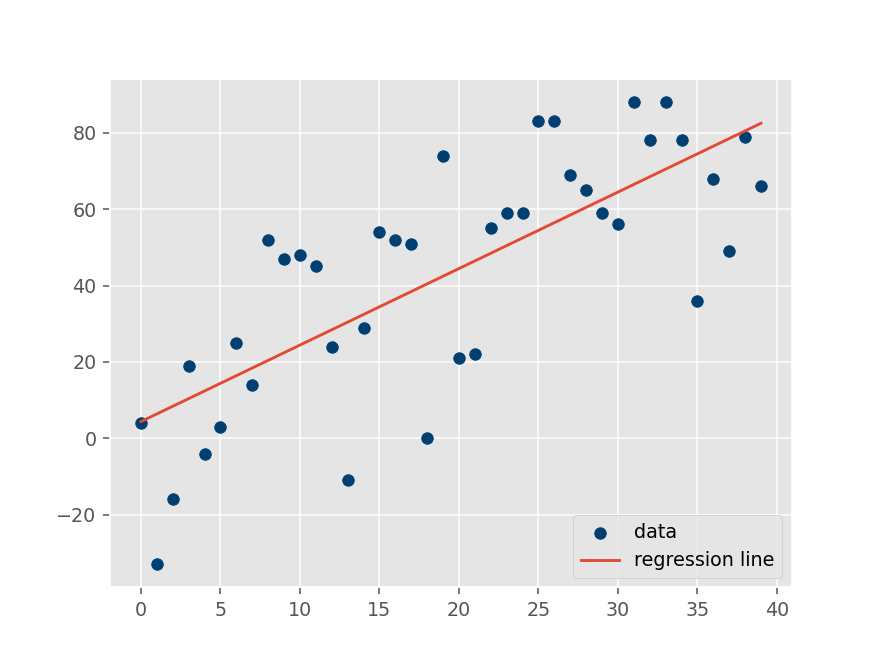

In [6]:
%matplotlib notebook
from statistics import mean
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)

    return m, b


def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]

    squared_error_regr = sum((ys_line - ys_orig) * (ys_line - ys_orig))
    squared_error_y_mean = sum((y_mean_line - ys_orig) * (y_mean_line - ys_orig))

    print("squared_error_regr = "+str(squared_error_regr))
    print("squared_error_y_mean = "+str(squared_error_y_mean))

    r_squared = 1 - (squared_error_regr/squared_error_y_mean)

    return r_squared


xs, ys = create_dataset(40,40,2,correlation='pos')
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)
print("r_squared = "+str(r_squared))

plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

## Note that the r_squared is much lower due to the variance being high. We can have much accurate model by reducing the variance.

squared_error_regr = 1102.318292682927
squared_error_y_mean = 21318.974999999995
r_squared = 0.9482940294886163


<IPython.core.display.Javascript object>


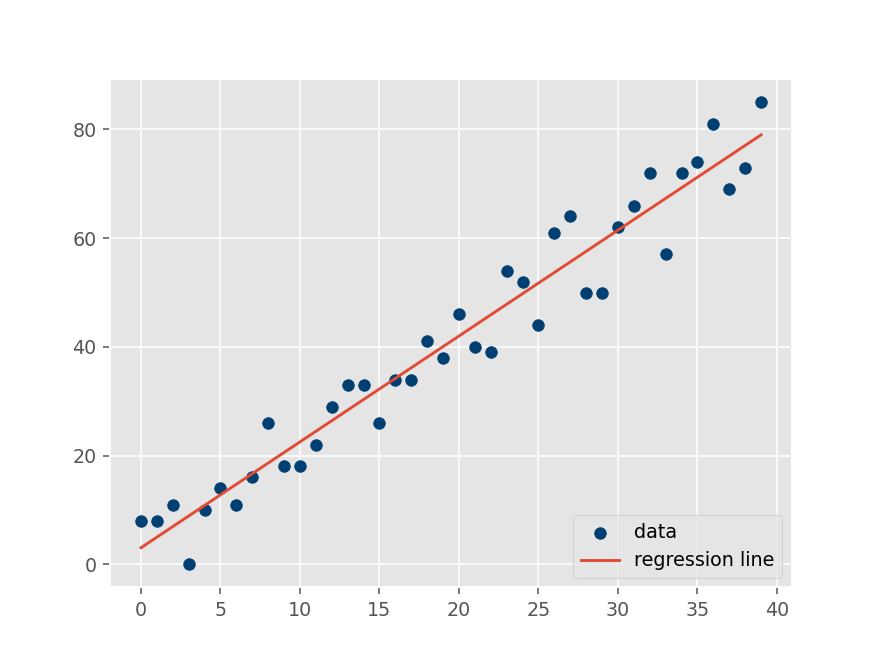

In [7]:
%matplotlib notebook
xs, ys = create_dataset(40,10,2,correlation='pos')
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)
print("r_squared = "+str(r_squared))

plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

squared_error_regr = 1013.4519699812387
squared_error_y_mean = 26881.099999999995
r_squared = 0.9622987165710764


<IPython.core.display.Javascript object>


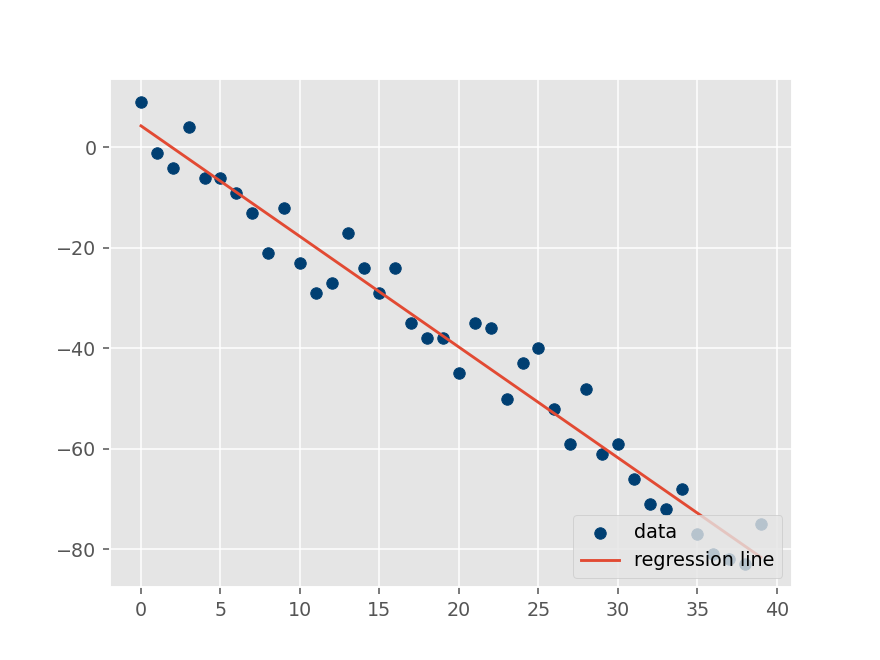

In [8]:
%matplotlib notebook
xs, ys = create_dataset(40,10,2,correlation='neg')
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)
print("r_squared = "+str(r_squared))

plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

## Negative Correlation

squared_error_regr = 1324.5696998123826
squared_error_y_mean = 1334.9749999999995
r_squared = 0.007794378312415473


<IPython.core.display.Javascript object>


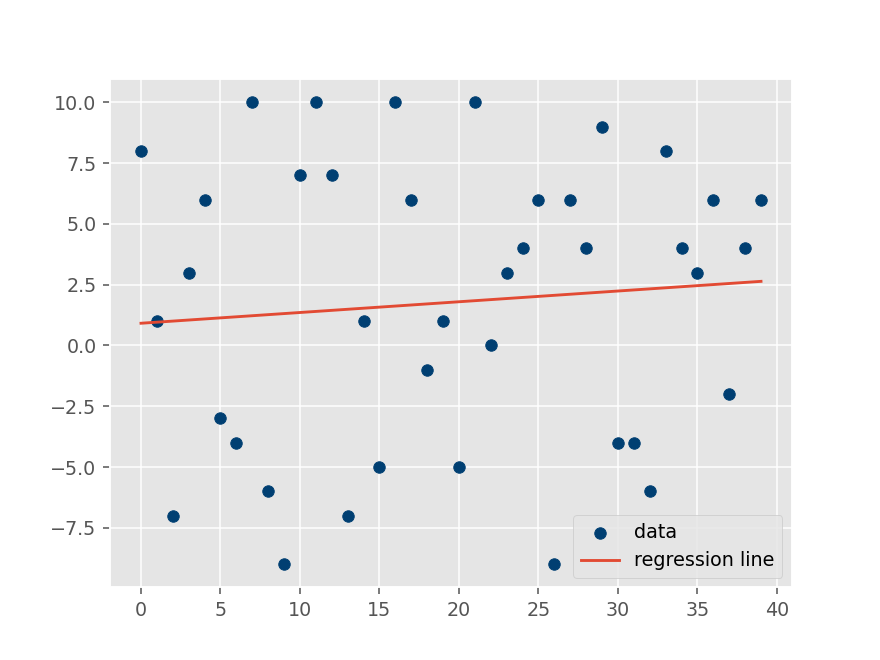

In [9]:
%matplotlib notebook
xs, ys = create_dataset(40,10,2)
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)
print("r_squared = "+str(r_squared))

plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

## When correlation is false (in the original function we kept the default value as correlation=False which is why if we do not write anything in our fuction for correlation then it takes the the default value i.e. False